In [15]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv('homes.csv') # https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# I don't like how the date is formatted, so we will change it into the format month, day, year
df['date'] = pd.to_datetime(df['date'])
df['dateStr'] = df['date'].dt.strftime('%B %d, %Y')
print(df['date'].head())
print(df['dateStr'].head())
df.head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]
0     October 13, 2014
1    December 09, 2014
2    February 25, 2015
3    December 09, 2014
4    February 18, 2015
Name: dateStr, dtype: object


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateStr
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,"October 13, 2014"
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,"December 09, 2014"
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,"February 25, 2015"
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,"December 09, 2014"
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,"February 18, 2015"


In [13]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'dateStr'],
      dtype='object')


In [11]:
# I believe when it comes down to the actual price, the factors we must care about are sqft, sqft_lot, yr_built, 
# bedroomCount, condition, and grade

In [48]:
X = df[['sqft_living', 'sqft_lot', 'yr_built', 'bedrooms', 'condition', 'grade','yr_renovated']].values
y = df['price']

# Checking to see if it matches up
print(X[0])
print(y[0])

[1180 5650 1955    3    3    7    0]
221900.0


In [49]:
# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)

In [50]:
# model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = model.predict(X_test)

In [52]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [53]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 53264837656.560135
R-squared: 0.613219183398954
Coefficients: [ 2.07354098e+02 -2.93889233e-01 -3.26499096e+03 -4.08081973e+04
  2.40204635e+04  1.34995011e+05  3.82758403e+01]
Intercept: 5569598.0268563125


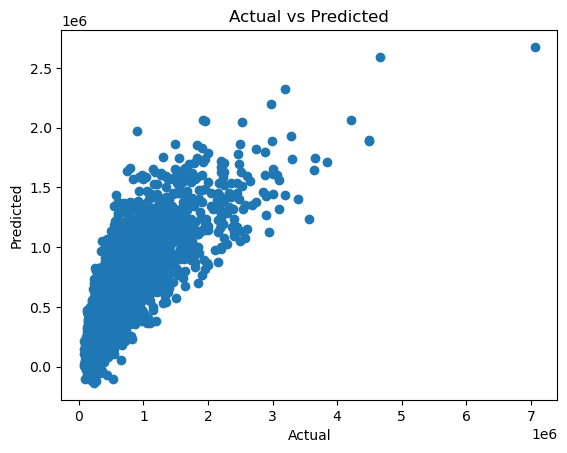

In [41]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

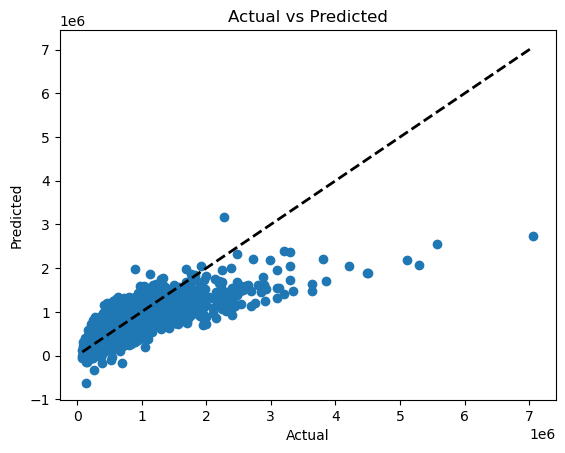

In [54]:
# Plot actual vs predicted with a diagonal line representing perfect predictions
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [56]:
# what if we looked at how far the town is from seattle for example, as seattle is a huge city, the closer
# the home is to seattle, the more expensive it is...
# Seattle: 47.6061° N, 122.3328° W

from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2=47.6061, lon2=-122.3328):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 6371 * c  # Radius of Earth in kilometers
    return distance
df['distance_to_seattle_km'] = df.apply(lambda row: haversine_distance(row['lat'], row['long']), axis=1)

In [57]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateStr,distance_to_seattle_km
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,"October 13, 2014",11.987713
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,"December 09, 2014",12.818026
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,"February 25, 2015",16.450625
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,"December 09, 2014",10.505528
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,"February 18, 2015",21.607004


In [58]:
X = df[['sqft_living', 'sqft_lot', 'yr_built', 'bedrooms', 'condition', 'grade','distance_to_seattle_km']].values

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=27)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 45432725353.955765
R-squared: 0.6693604728561657
Coefficients: [ 2.21482481e+02  2.75478148e-01 -1.72923976e+03 -3.89423689e+04
  2.80088812e+04  1.07995079e+05 -9.31677147e+03]
Intercept: 2864529.630351687
